In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000,825000
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Movie Name          1698 non-null   object
 1   Release Period      1698 non-null   object
 2   Whether Remake      1698 non-null   object
 3   Whether Franchise   1698 non-null   object
 4   Genre               1698 non-null   object
 5   New Actor           1698 non-null   object
 6   New Director        1698 non-null   object
 7   New Music Director  1698 non-null   object
 8   Lead Star           1698 non-null   object
 9   Director            1698 non-null   object
 10  Music Director      1698 non-null   object
 11  Number of Screens   1698 non-null   int64 
 12  Revenue(INR)        1698 non-null   int64 
 13  Budget(INR)         1698 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 185.8+ KB


In [9]:
df.describe()

,Number of Screens,Revenue(INR),Budget(INR)
count,1698.000000,1.698000e+03,1.698000e+03
mean,553.831567,1.501674e+08,2.377287e+08
std,782.951839,2.434838e+08,6.134398e+08
min,1.000000,3.250000e+05,7.250000e+03
25%,30.000000,1.500000e+07,1.150000e+06
50%,200.000000,5.500000e+07,1.240000e+07
75%,800.000000,1.900000e+08,1.778325e+08
max,4600.000000,2.100000e+09,8.016120e+09


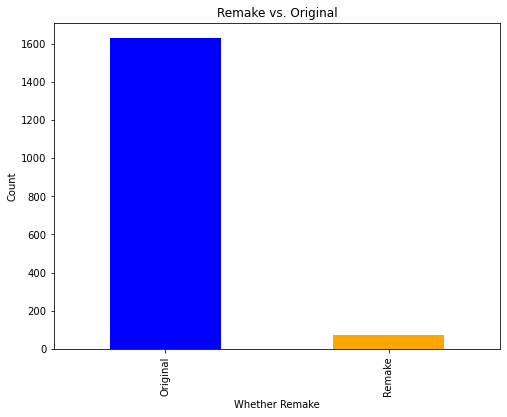

In [13]:
# 1. Bar plot for "Whether Remake"
plt.figure(figsize=(8, 6))
remake_counts = df["Whether Remake"].value_counts()
remake_counts.plot(kind="bar", color=['blue', 'orange'])
plt.title("Remake vs. Original")
plt.xticks([0, 1], ["Original", "Remake"])
plt.xlabel("Whether Remake")
plt.ylabel("Count")
plt.show()

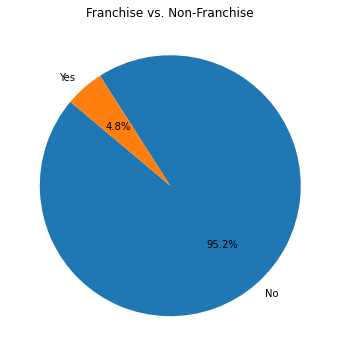

In [14]:
# 2. Pie chart for "Whether Franchise"
plt.figure(figsize=(8, 6))
franchise_counts = df["Whether Franchise"].value_counts()
plt.pie(franchise_counts, labels=["No", "Yes"], autopct='%1.1f%%', startangle=140)
plt.title("Franchise vs. Non-Franchise")
plt.show()

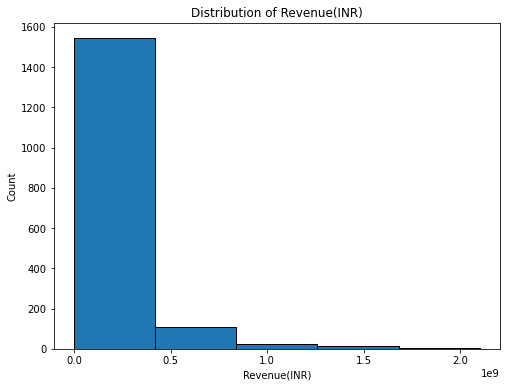

In [15]:
# 3. Histogram for "Revenue(INR)"
plt.figure(figsize=(8, 6))
plt.hist(df["Revenue(INR)"], bins=5, edgecolor='k')
plt.title("Distribution of Revenue(INR)")
plt.xlabel("Revenue(INR)")
plt.ylabel("Count")
plt.show()

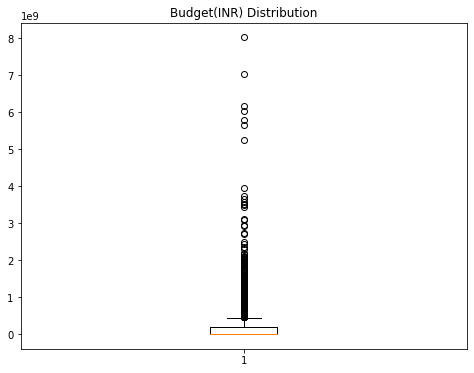

In [16]:
# 4. Box plot for "Budget(INR)"
plt.figure(figsize=(8, 6))
plt.boxplot(df["Budget(INR)"])
plt.title("Budget(INR) Distribution")
plt.show()

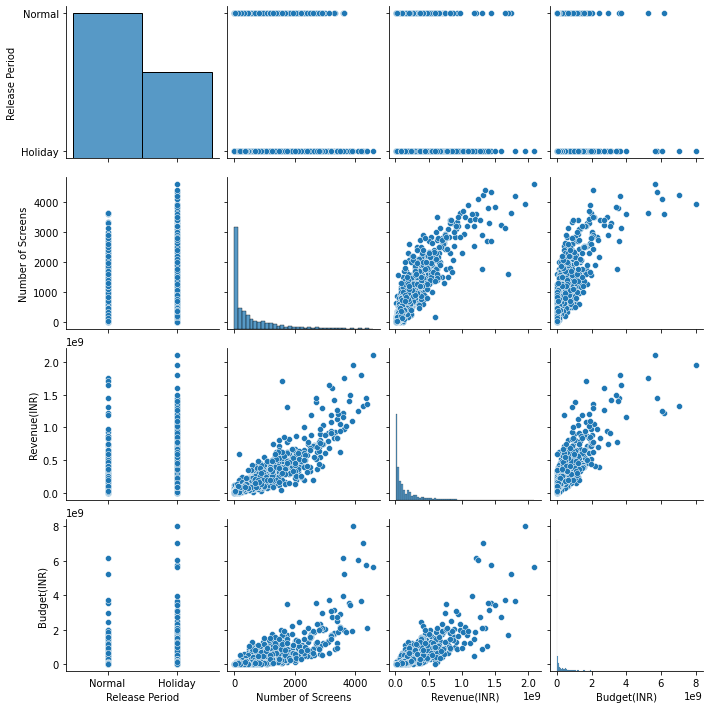

In [18]:
# Pair plot to visualize relationships between numerical attributes
sns.pairplot(df, vars=["Release Period", "Number of Screens", "Revenue(INR)", "Budget(INR)"])
plt.show()

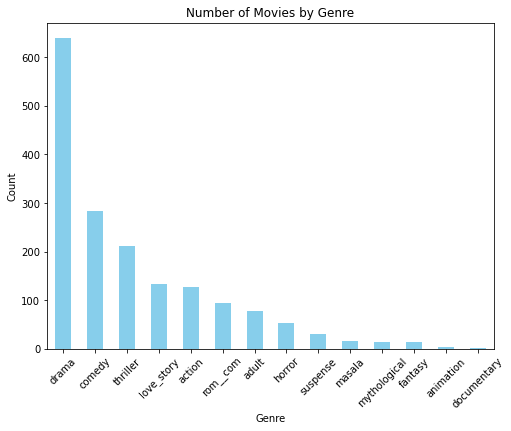

In [19]:
# Bar plot for the number of movies by genre
plt.figure(figsize=(8, 6))
genre_counts = df["Genre"].value_counts()
genre_counts.plot(kind="bar", color='skyblue')
plt.title("Number of Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

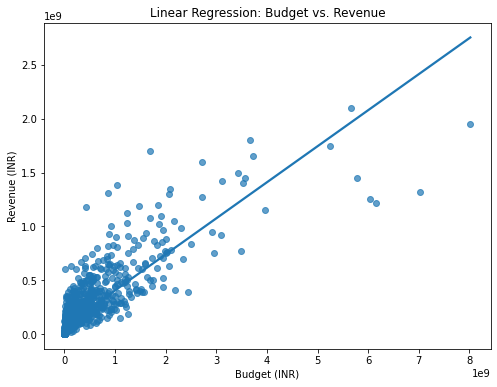

In [21]:
# Create a scatter plot with a linear regression line
plt.figure(figsize=(8, 6))
sns.regplot(x="Budget(INR)", y="Revenue(INR)", data=df, ci=None, scatter_kws={'alpha':0.7})
plt.title("Linear Regression: Budget vs. Revenue")
plt.xlabel("Budget (INR)")
plt.ylabel("Revenue (INR)")
plt.show()

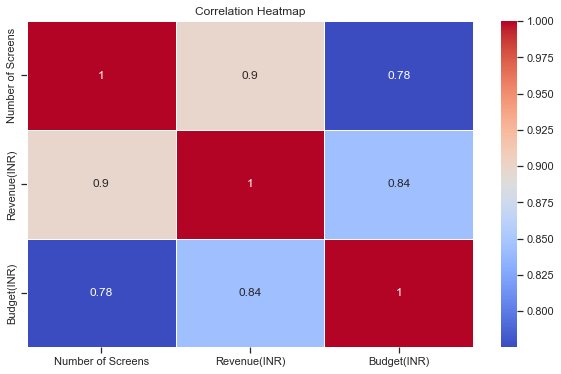

In [23]:
# 9. Heatmap to visualize correlations between numeric attributes
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [4]:
# we can see that the names of movies contains puncuation marks so we need to remove it
for index, row in df.iterrows():
    if "," in row["Movie Name"]:
        print (row["Movie Name"])

With Love, Delhi!
I, Me Aur Main
Oh, My God!!


In [5]:
movie = "name,release_period,remake,franchise,genre,screens,revenue,budget\n"

director_movie = "director,movie,new_director\n"
actor_movie = "actor,movie,new_actor\n"

for index, row in df.iterrows():
    actor = row["Lead Star"]
    director = row["Director"]

    movie_name = row["Movie Name"].replace(",", ".")

    new_actor = row["New Actor"]
    new_director = row["New Director"]
    
    director_movie += f"{director},{movie_name},{new_director}\n"
    actor_movie += f"{actor},{movie_name},{new_actor}\n"

    movie += f"{movie_name},{row['Release Period']},{row['Whether Remake']},{row['Whether Franchise']},{row['Genre']},{row['Number of Screens']},{row['Revenue(INR)']},{row['Budget(INR)']}\n"

In [7]:
# saved the three csv file
output_file = open("movie.csv", 'w')
output_file.write(movie)
output_file.close()

output_file = open("director_movie.csv", 'w')
output_file.write(director_movie)
output_file.close()

output_file = open("actor_movie.csv", 'w')
output_file.write(actor_movie)
output_file.close()